<a href="https://colab.research.google.com/github/msaad1311/Crop-Price-Prediction/blob/master/Copy_of_ECE657_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Make sure that you have all these libaries available to run the code successfully
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import csv
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import LSTM,Dense,Dropout,Bidirectional,Activation
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

Using TensorFlow backend.


In [0]:
df = pd.read_excel("bok choi.xlsx")

In [0]:
df.head()

,Price
0,12.7
1,17.1
2,20.9
3,17.6
4,17.6


In [0]:
df.describe()

,Price
count,27895.000000
mean,21.684187
std,13.725427
min,0.000000
25%,12.000000
50%,18.000000
75%,26.900000
max,128.200000


In [0]:
df["Index"]=np.arange(len(df))
df.head()

,Price,Index
0,12.7,0
1,17.1,1
2,20.9,2
3,17.6,3
4,17.6,4


In [0]:
df=df[["Index","Price"]]
df.head()

,Index,Price
0,0,12.7
1,1,17.1
2,2,20.9
3,3,17.6
4,4,17.6


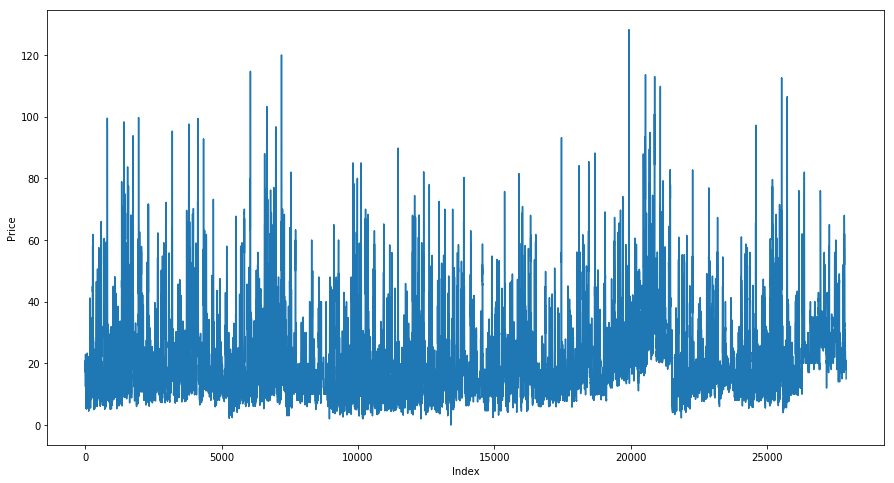

In [0]:
plt.figure(figsize=(15,8))
plt.plot(df["Index"],df["Price"])
plt.xlabel("Index")
plt.ylabel("Price")
plt.show()

In [0]:
df = df['Price'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:5]

(27895, 1)


array([[12.7],
       [17.1],
       [20.9],
       [17.6],
       [17.6]])

In [0]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(22316, 1)
(5579, 1)


In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.09906396],
       [0.13338534],
       [0.16302652],
       [0.13728549],
       [0.13728549]])

In [0]:
dataset_test = scaler.transform(dataset_test)
dataset_test[-1]

array([0.11700468])

In [0]:
def create_dataset(df,lookback=60,lookahead=0):
    x = []
    y = []
    for i in range(lookback, df.shape[0]-lookahead):
        x.append(df[i-lookback:i, 0])
        y.append(df[i+lookahead, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [0]:
import xlwt 
from xlwt import Workbook
from keras import optimizers
import keras

# All parameter gradients will be clipped to
# a maximum norm of 1.
sgd = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
keras.backend.set_epsilon(1)
wb=Workbook()
sheet1 = wb.add_sheet('Sheet 1')

for i in range(0,20,1):
  print("Looking",i+1,"Days ahead")
  x_train, y_train = create_dataset(dataset_train,10,i)
  x_test, y_test = create_dataset(dataset_test,10,i)
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  print(x_train.shape)
  print(x_test.shape)

  main_model= Sequential()
  main_model.add(LSTM(units=100, return_sequences=False, input_shape=(x_train.shape[1], 1)))
  main_model.add(Dropout(0.2))
  main_model.add(Dense(units=1))
  main_model.add(Activation("relu"))
  main_model.compile(loss='mean_absolute_percentage_error', optimizer='adam' ,metrics=['mse', 'mape'])

  if(not os.path.exists('stock_prediction.h5')):
    history=main_model.fit(x_train, y_train, epochs=150,batch_size=1024,validation_data=(x_test,y_test))
    plt.plot(history.history['mean_squared_error'],color="red")
    #plt.plot(history.history['mean_absolute_error'])
    #plt.plot(history.history['mean_absolute_percentage_error'])
    #plt.plot(history.history['cosine_proximity'])
    plt.show()
  print("====================================================================================================================")

  sheet1.write(i+1,0,history.history['val_mean_absolute_percentage_error'][-1])
  

wb.save('Bok Choi Result(1).xls') 
                                  
                                

W0730 01:24:59.523712 139924779968384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0730 01:24:59.527673 139924779968384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0730 01:24:59.530640 139924779968384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



Looking 1 Days ahead
(22306, 10, 1)
(5569, 10, 1)


W0730 01:24:59.768642 139924779968384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0730 01:24:59.776982 139924779968384 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
W0730 01:24:59.802870 139924779968384 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0730 01:25:00.080505 139924779968384 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_

Train on 22306 samples, validate on 5569 samples
Epoch 1/150
22306/22306 [==============================] - 5s 204us/step - loss: 10.1249 - mean_squared_error: 0.0203 - mean_absolute_percentage_error: 10.1249 - val_loss: 5.8986 - val_mean_squared_error: 0.0077 - val_mean_absolute_percentage_error: 5.8986
Epoch 2/150
22306/22306 [==============================] - 0s 19us/step - loss: 7.1102 - mean_squared_error: 0.0097 - mean_absolute_percentage_error: 7.1102 - val_loss: 5.7597 - val_mean_squared_error: 0.0075 - val_mean_absolute_percentage_error: 5.7597
Epoch 3/150
22306/22306 [==============================] - 0s 19us/step - loss: 6.6192 - mean_squared_error: 0.0100 - mean_absolute_percentage_error: 6.6192 - val_loss: 5.7219 - val_mean_squared_error: 0.0075 - val_mean_absolute_percentage_error: 5.7219
Epoch 4/150
22306/22306 [==============================] - 0s 19us/step - loss: 6.2888 - mean_squared_error: 0.0088 - mean_absolute_percentage_error: 6.2888 - val_loss: 5.3084 - val_mean

KeyboardInterrupt: ignored